In [4]:
import matplotlib.pyplot as plt
import pandas as pd
train_df = pd.read_csv('../data/train_set.csv',sep='\t',nrows=100)

In [5]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [10]:
%matplotlib inline
train_df['text_len'] = train_df['text'].apply(lambda x:len(x.split(' ')))
print(train_df['text_len'].describe())

count     100.000000
mean      872.320000
std       923.138191
min        64.000000
25%       359.500000
50%       598.000000
75%      1058.000000
max      7125.000000
Name: text_len, dtype: float64


Text(0.5, 1.0, 'Histogram of char count')

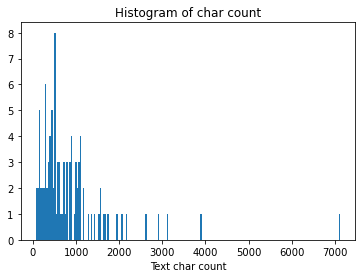

In [15]:
# _  = plt.hist(train_df['text_len'],bins=200)
# plt.xlabel('Text char count')
# plt.title('Histogram of char count')

train_df['text_len'].plot(kind='hist',bins=200)
plt.xlabel('Text char count')
plt.ylabel('')
plt.title('Histogram of char count')

Text(0.5, 0, 'category')

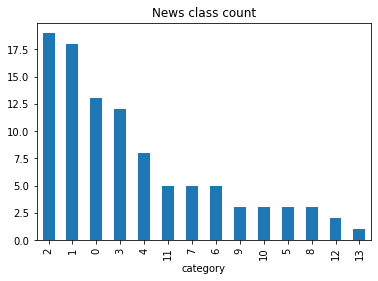

In [12]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel('category')

In [16]:
from collections import Counter
# Counter计数器：统计可迭代序列中每个元素出现的次数
# list_01 = [1,9,9,5,0,8,0,9]  # input
# print(Counter(list_01))  #Counter({9: 3, 0: 2, 1: 1, 5: 1, 8: 1})
all_lines = ''.join(list(train_df['text']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(),key=lambda d:d[1],reverse=True)

print(len(word_count))
print(word_count[0])
print(word_count[-1])

2493
('3750', 3702)
('5034', 1)


In [31]:
from collections import Counter

def flatten(t):
    return [item for sublist in t for item in sublist]

train_df['text_unique'] = train_df['text'].apply(lambda x:' '.join(list(set(x.split(' ')))))
all_lines = ''.join(list(train_df['text_unique']))
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(),key=lambda d:int(d[1]),reverse=True)

for i in range(3):
    print(word_count[i])

('900', 99)
('3750', 99)
('648', 96)


In [33]:
# 统计每条评论的句子数
train_df['sentence_count'] = train_df['text'].apply(lambda x:{
    len([v for v in x.split(' ') if v=='900' or v=='3750' or v=='648'])
})
print(train_df)

    label                                               text  text_len  \
0       2  2967 6758 339 2021 1854 3731 4109 3792 4149 15...      1057   
1      11  4464 486 6352 5619 2465 4802 1452 3137 5778 54...       486   
2       3  7346 4068 5074 3747 5681 6093 1777 2226 7354 6...       764   
3       2  7159 948 4866 2109 5520 2490 211 3956 5520 549...      1570   
4       3  3646 3055 3055 2490 4659 6065 3370 5814 2465 5...       307   
..    ...                                                ...       ...   
95      7  6065 3370 1519 499 7157 5620 3317 1679 3270 12...      1438   
96      1  7256 134 7539 7543 3137 3335 2695 669 3068 333...       136   
97      2  7160 5087 2400 4411 7044 1519 7039 2265 408 67...      2159   
98      2  507 6981 2999 62 3080 6704 5310 2400 4411 1099...      1190   
99      4  3870 3641 6248 913 1866 7495 3648 5370 4333 45...       199   

                                          text_unique  words sentence_count  
0   1734 3771 6591 5659 7148 2073